### 图像预处理

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

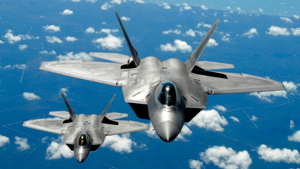

In [2]:

# 本文中主要使用cv2处理图片，但不利于在notebook中展示，所以使用plt输出前做简单处理
def img_convert(cv2_img):
    """
    cv2使用BGR，plt使用RGB
    包含灰度，3通道，4通道
    下面这个不好使
    ret_img = cv2.cvtColor(ret_img, cv2.COLOR_BGR2RGB)
    """
    
    print(len(cv2_img.shape))
    if len(cv2_img.shape) == 2:
        return cv2_img
    elif len(cv2_img.shape) == 3 and cv2_img.shape[2] == 3:
        return cv2_img[: , : , : : -1] ### to rgb
    elif len(cv2_img.shape) == 3 and cv2_img.shape[2] == 4:
        b, g, r, a = cv2.split(cv2_img)
        return cv2.merge((r, g, b, a))
    else:
        return cv2_img


def topil(cv2_img):
    """ cv2 to pil img"""
    
    if len(cv2_img.shape) == 3 and cv2_img.shape[2] == 3:
        return Image.fromarray(cv2_img[: , : , : : -1])
    
    elif len(cv2_img.shape) == 2:
        return Image.fromarray(cv2_img)
    
    
def tocv(pil_img):
    """pil to cv img"""
    
    return cv2.cvtColor(pil_img[:,:,::-1])


ori_img = cv2.imread("./img/1.jpg")
p = topil(ori_img)
p.thumbnail((300,300)) ### 更新p
p

3
3
2
2
2
2


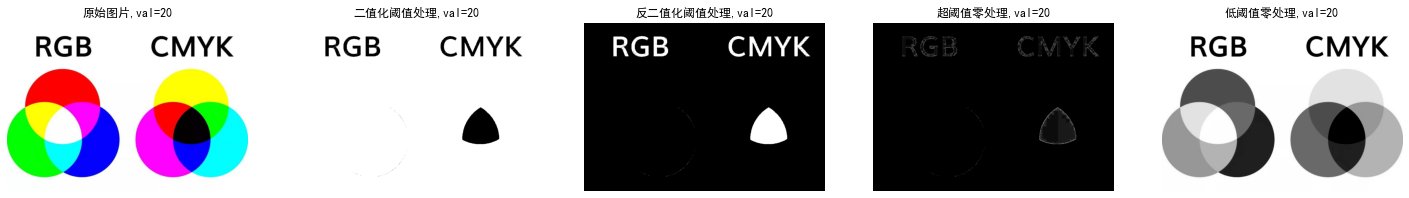

3
3
2
2
2
2


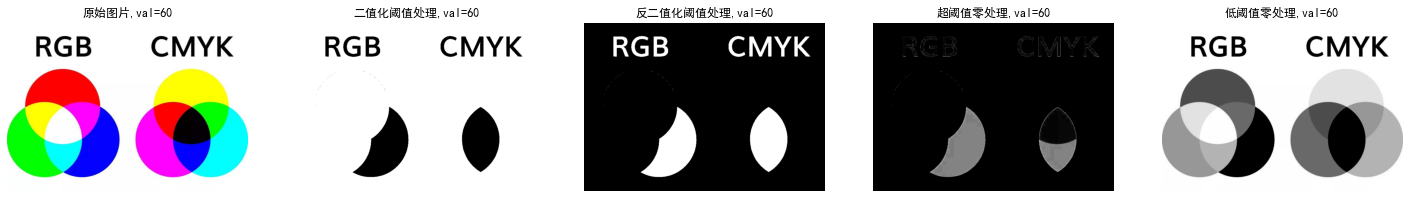

3
3
2
2
2
2


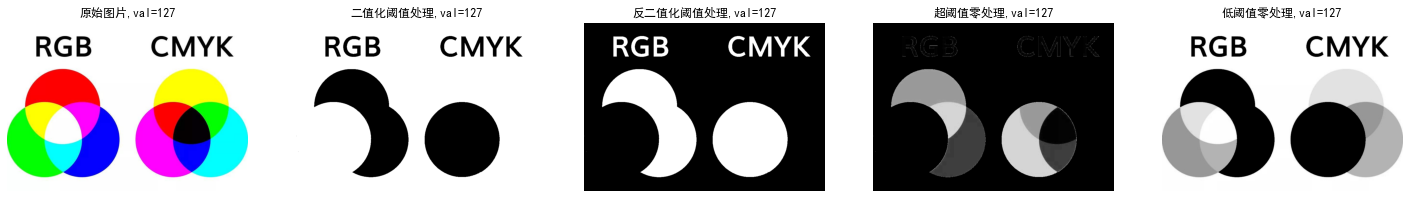

In [4]:

def show_thres1(cv2_img, val = 127):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    gray = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
    
    methods = {"cv2_img": "原始图片", "cv2.THRESH_BINARY": "二值化阈值处理", "cv2.THRESH_BINARY_INV": "反二值化阈值处理",
               "cv2.THRESH_TOZERO_INV": "超阈值零处理", "cv2.THRESH_TOZERO":"低阈值零处理",}

    imgs = []
    _,th1 = cv2.threshold(gray, val, 255, cv2.THRESH_BINARY)
    _,th2 = cv2.threshold(gray, val, 255, cv2.THRESH_BINARY_INV)
    _,th3 = cv2.threshold(gray, val, 255, cv2.THRESH_TOZERO_INV)
    _,th4 = cv2.threshold(gray, val, 255, cv2.THRESH_TOZERO)
    imgs.append(cv2_img)
    imgs.append(th1)
    imgs.append(th2)
    imgs.append(th3)
    imgs.append(th4)
    
    
    plt.figure(figsize=(25, 30))
    for i in range(1, len(imgs)+1, 1):
        if i == 1:
            plt.subplot(1, 5, i), plt.imshow(img_convert(imgs[i-1]))
        plt.subplot(1, 5, i), plt.imshow(img_convert(imgs[i-1]), 'gray')
        plt.title(f"{list(methods.values())[i - 1]},val={val}")
        plt.axis('off') 
        
    plt.show()
    
cv2_img= cv2.imread("./img/3.jpg")

p1 = show_thres1(cv2_img, 20)
p2 = show_thres1(cv2_img, 60)
p3 = show_thres1(cv2_img, 127)

2
2
2
2
2
2
2
2
2


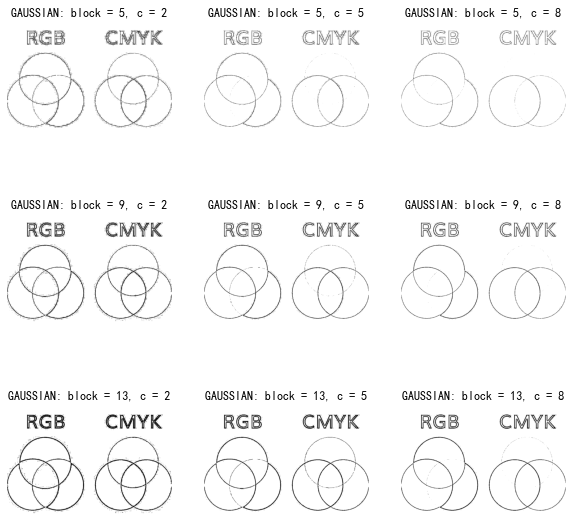

In [6]:
title = []
imgs = [[]]

cv2_img= cv2.imread("./img/3.jpg")
img_gray = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
for block in range(5, 15, 4):
    for c in range(2, 10, 3):
        th = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block, c)
        title.append('GAUSSIAN: block = ' + str(block) + ', c = ' + str(c))
        imgs = imgs + [th]

plt.figure(figsize=(10, 10))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i), plt.imshow(img_convert(imgs[i]), 'gray')
    plt.title(title[i - 1])
    plt.axis('off')
plt.show()

### 图片平滑处理

In [1]:
from skimage.util import random_noise
import cv2,random

import skimage
from skimage import util
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
from urllib import request
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


(-0.5, 499.5, 750.5, -0.5)

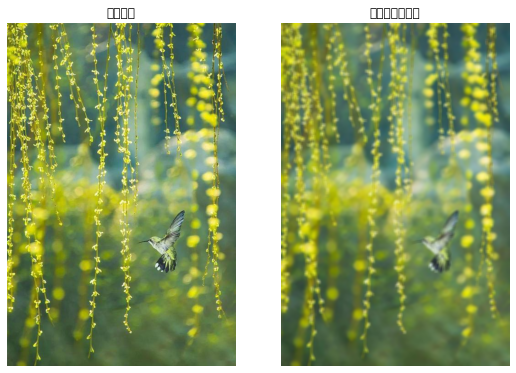

In [31]:
def cv2pil(cv2_img):
    if len(cv2_img.shape) == 2:
        return Image.fromarray(cv2_img)
    
    elif len(cv2_img.shape) == 3:
        return Image.fromarray(cv2_img[:,:,::-1])
    
    else:
        print("格式有问题")
        
        return cv2_img


def pil2cv(pil_img):
    return cv2.cvtColor(np.asarray(pil_img),cv2.COLOR_RGB2BGR)


def url2img(url_path):
    resp = request.urlopen(url_path)
    image = np.asarray(bytearray(resp.read()), dtype="uint8") ### 字节流数组
    img = cv2.imdecode(image, 1)
    
    return img




url_path = 'https://img2.baidu.com/it/u=2216096933,3802696806&fm=253&fmt=auto&app=138&f=JPEG?w=500&h=751'
ori_img = url2img(url_path)
blur_img = cv2.blur(ori_img, (7,7))

plt.figure(figsize=(9, 15))
plt.subplot(121),plt.imshow(ori_img[:,:,::-1]),plt.title('原始图像')
plt.axis('off')
plt.subplot(122),plt.imshow(blur_img[:,:,::-1]),plt.title('平滑处理后图像')
plt.axis('off')


In [44]:
ori_img.shape

(751, 500, 3)

In [62]:

def gasuss_noise(cv2_img, mean=0, var=0.001):
    '''
    手动添加高斯噪声
    mean : 均值
    var : 方差
    '''
    image = np.array(cv2_img/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)  # 正态分布
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    del cv2_img, image
    
    return out


def sp_noise(cv2_img,prob=0.1):
    '''
    手动添加椒盐噪声
    prob:噪声比例
    '''
    output = np.zeros(cv2_img.shape, np.uint8)
    thres = 1 - prob
    for i in range(cv2_img.shape[0]):
        for j in range(cv2_img.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = cv2_img[i][j]
    return output



def api_noise(img,mode):
    '''
    直接调用skimage库函数，对图片进行加噪
    :param img: 读入图像
    :param mode:
    可选择，str型，表示要添加的噪声类型
        gaussian：高斯噪声
        localvar：高斯分布的加性噪声，在“图像”的每个点处具有指定的局部方差。
        poisson：泊松再生
        salt：盐噪声，随机将像素值变成1
        pepper：椒噪声，随机将像素值变成0或-1，取决于矩阵的值是否带符号
        s&p：椒盐噪声
        speckle：均匀噪声（均值mean方差variance），out=image+n*image
    :return: 加噪后的图像
    '''
    noise_gs_img = util.random_noise(img, mode)
    noise_gs_img = noise_gs_img * 255  # 由于输出是[0，1]的浮点型，先转成灰度图（我的输入就是灰度图）
    noise_gs_img = noise_gs_img.astype(np.int16)  # 再变成整型数组
    return noise_gs_img


# topil(sp_noise(ori_img))

# a = api_noise(ori_img, "gaussian")
# plt.imshow(a)

(-0.5, 251.5, 448.5, -0.5)

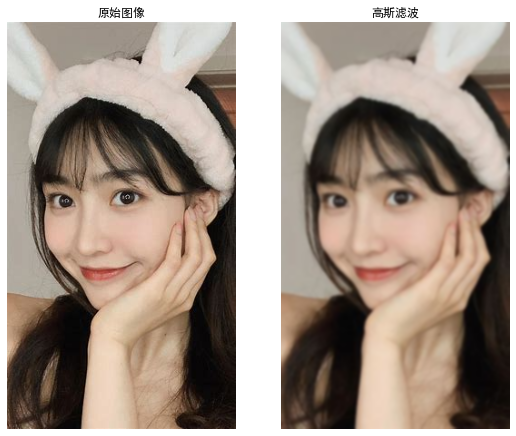

In [72]:
url_path = 'https://tse3-mm.cn.bing.net/th/id/OIP-C.2k-XK9e1-elc-Hyz2PO7tAHaNK?w=187&h=333&c=7&r=0&o=5&dpr=1.35&pid=1.7'
ori_img = url2img(url_path)

# ori_img = cv2.imread("img/1.jpg")
# blur_img = cv2.blur(ori_img, (7,7))
gblur = cv2.GaussianBlur(ori_img,(7,7), 0)
mblur = cv2.medianBlur(ori_img,7)

plt.figure(figsize=(9, 15))
plt.subplot(121),plt.imshow(ori_img[:,:,::-1]),plt.title('原始图像')
plt.axis('off')
plt.subplot(122),plt.imshow(gblur[:,:,::-1]),plt.title('高斯滤波')
plt.axis('off')



(-0.5, 731.5, 582.5, -0.5)

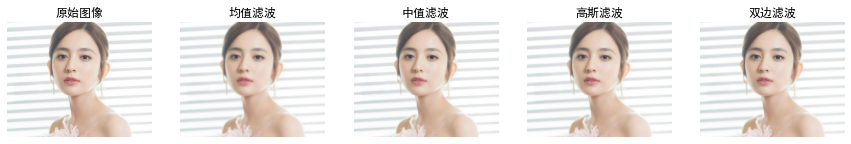

In [101]:
#### 添加噪音 --- 低通滤波器

url_path = 'https://tse3-mm.cn.bing.net/th/id/OIP-C.2k-XK9e1-elc-Hyz2PO7tAHaNK?w=187&h=333&c=7&r=0&o=5&dpr=1.35&pid=1.7'
url_path = 'https://tse1-mm.cn.bing.net/th/id/R-C.eca409afb379667803e5c7b863b62269?rik=xHhWbH%2fwZDD5fg&riu=http%3a%2f%2fqimg.hxnews.com%2f2017%2f1226%2f1514251867325.jpg&ehk=xZUsr9BPCeTJVlHScwTF73NV5Psqdghnj8li8smG%2fW8%3d&risl=&pid=ImgRaw&r=0'
# url_path= 'https://scpic.chinaz.net/files/pic/pic9/201712/bpic4682.jpg'


ori_img = url2img(url_path)

# ori_img = cv2.imread("img/1.jpg")
blur_img = cv2.blur(ori_img, (7,7))
gblur = cv2.GaussianBlur(ori_img,(7,7), 0)
mblur = cv2.medianBlur(ori_img, 7)
bblur = cv2.bilateralFilter(ori_img, 9, 75, 75)

plt.figure(figsize=(15, 25))
plt.subplot(151),plt.imshow(ori_img[:,:,::-1]),plt.title('原始图像')
plt.axis('off')
plt.subplot(152),plt.imshow(blur_img[:,:,::-1]),plt.title('均值滤波')
plt.axis('off')
plt.subplot(153),plt.imshow(mblur[:,:,::-1]),plt.title('中值滤波')
plt.axis('off')
plt.subplot(154),plt.imshow(gblur[:,:,::-1]),plt.title('高斯滤波')
plt.axis('off')
plt.subplot(155),plt.imshow(bblur[:,:,::-1]),plt.title('双边滤波')
plt.axis('off')

(-0.5, 731.5, 582.5, -0.5)

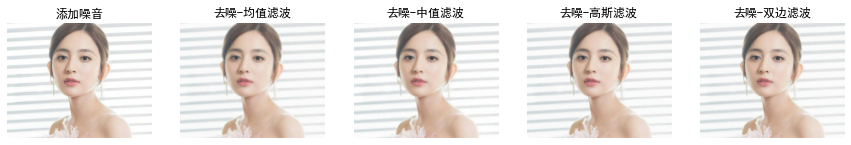

In [102]:
#### 去除噪音 --- 低通滤波器

url_path = 'https://tse3-mm.cn.bing.net/th/id/OIP-C.2k-XK9e1-elc-Hyz2PO7tAHaNK?w=187&h=333&c=7&r=0&o=5&dpr=1.35&pid=1.7'
url_path = 'https://tse1-mm.cn.bing.net/th/id/R-C.eca409afb379667803e5c7b863b62269?rik=xHhWbH%2fwZDD5fg&riu=http%3a%2f%2fqimg.hxnews.com%2f2017%2f1226%2f1514251867325.jpg&ehk=xZUsr9BPCeTJVlHScwTF73NV5Psqdghnj8li8smG%2fW8%3d&risl=&pid=ImgRaw&r=0'
# url_path= 'https://scpic.chinaz.net/files/pic/pic9/201712/bpic4682.jpg'


ori_img = url2img(url_path)

noise_img = gasuss_noise(ori_img)
blur_img = cv2.blur(noise_img, (7,7))
gblur = cv2.GaussianBlur(noise_img,(7,7), 0)
mblur = cv2.medianBlur(noise_img, 7)
bblur = cv2.bilateralFilter(noise_img, 9, 75, 75)

plt.figure(figsize=(15, 25))
plt.subplot(151),plt.imshow(ori_img[:,:,::-1]),plt.title('添加噪音')
plt.axis('off')
plt.subplot(152),plt.imshow(blur_img[:,:,::-1]),plt.title('去噪-均值滤波')
plt.axis('off')
plt.subplot(153),plt.imshow(mblur[:,:,::-1]),plt.title('去噪-中值滤波')
plt.axis('off')
plt.subplot(154),plt.imshow(gblur[:,:,::-1]),plt.title('去噪-高斯滤波')
plt.axis('off')
plt.subplot(155),plt.imshow(bblur[:,:,::-1]),plt.title('去噪-双边滤波')
plt.axis('off')

### 形态学转换

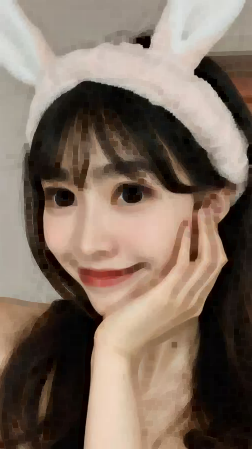

In [2]:
from skimage.util import random_noise
import cv2,random

import skimage
from skimage import util
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
from urllib import request
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline



def cv2pil(cv2_img):
    if len(cv2_img.shape) == 2:
        return Image.fromarray(cv2_img)
    
    elif len(cv2_img.shape) == 3:
        return Image.fromarray(cv2_img[:,:,::-1])
    
    else:
        print("格式有问题")
        
        return cv2_img


def url2img(url_path):
    resp = request.urlopen(url_path)
    image = np.asarray(bytearray(resp.read()), dtype="uint8") ### 字节流数组
    img = cv2.imdecode(image, 1)
    
    return img


def imgmask(cv2_img):
    kernel = (5,5)
    gray = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, kernel, 0)
    ret,th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return th

url_path = 'https://tse3-mm.cn.bing.net/th/id/OIP-C.2k-XK9e1-elc-Hyz2PO7tAHaNK?w=187&h=333&c=7&r=0&o=5&dpr=1.35&pid=1.7'

ori_img = url2img(url_path)



kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(ori_img,kernel,iterations = 1)

cv2pil(erosion)


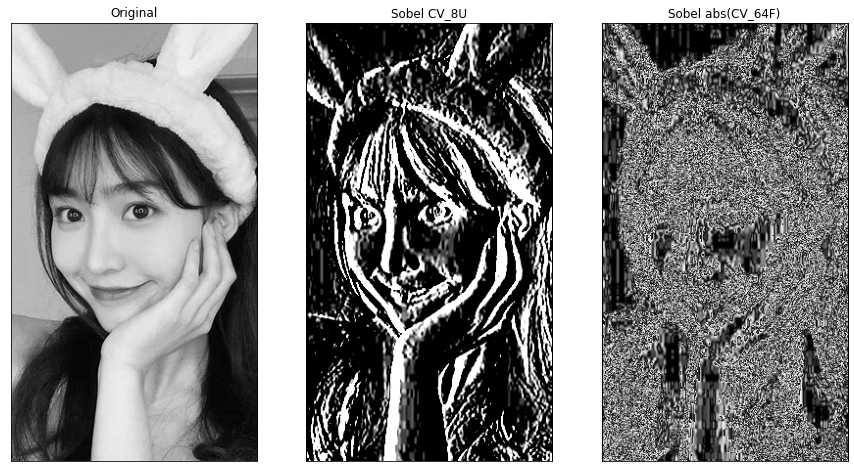

In [3]:

gray = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
sobelx8u = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=5)
# 也可以将参数设为-1
# sobelx8u = cv2.Sobel(gray,-1,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U

sobelx64f = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.figure(figsize=(15, 25))
plt.subplot(1,3,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

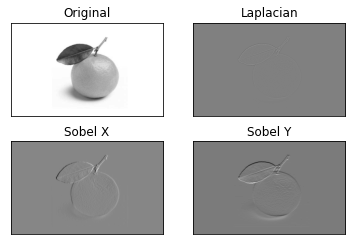

In [4]:


url_path = 'https://tse3-mm.cn.bing.net/th/id/OIP-C.2k-XK9e1-elc-Hyz2PO7tAHaNK?w=187&h=333&c=7&r=0&o=5&dpr=1.35&pid=1.7'

ori_img = url2img(url_path)
ori_img = cv2.imread("./img/jz.jpg")
gray = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)

#cv2.CV_64F 输出图像的深度（数据类型），可以使用-1, 与原图像保持一致 np.uint8
laplacian=cv2.Laplacian(gray,cv2.CV_64F)
# 参数 1,0 为只在 x 方向求一阶导数，最大可以求 2 阶导数。
sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
# 参数 0,1 为只在 y 方向求一阶导数，最大可以求 2 阶导数。
sobely=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
# plt.figure(figsize=(6,8))
plt.subplot(2,2,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


(Text(0.5, 1.0, 'Edges'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

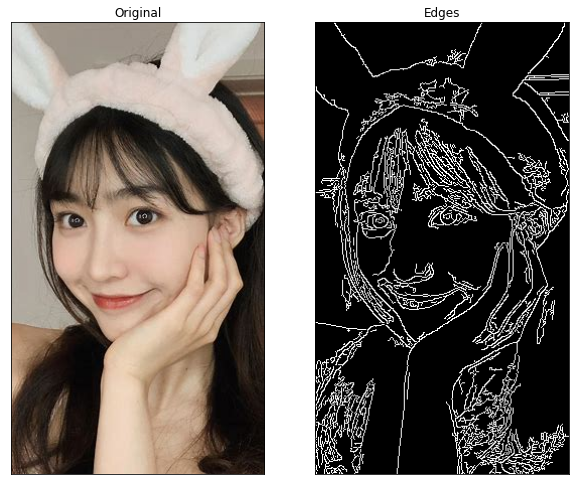

In [14]:
#### 图片处理基础



def canny(cv2_img, valMin, valMax):
    """ canny 边缘检测 """
    gray = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, valMin, valMax)
    
    return edges


url_path = 'https://tse3-mm.cn.bing.net/th/id/OIP-C.2k-XK9e1-elc-Hyz2PO7tAHaNK?w=187&h=333&c=7&r=0&o=5&dpr=1.35&pid=1.7'
ori_img = url2img(url_path)
edges = canny(ori_img, 10, 200)

plt.figure(figsize=(10, 12))
plt.subplot(1,2,1),plt.imshow(ori_img[:,:,::-1])
plt.title('原始图片'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges, cmap = 'gray')
plt.title('边缘检测'), plt.xticks([]), plt.yticks([])

In [17]:
#### 图像金金字塔

def GussianPyramid(image): # 高斯金字塔
    level = 2  # 金字塔的层数
    imgCopy = image.copy()
    pydowns = []
    for i in range(level):
        dst = cv2.pyrDown(imgCopy)
        pydowns.append(dst) 
        cv2.namedWindow(f"down-{i}", 0)
        cv2.imshow(f"down-{i}", dst)
        imgCopy = dst.copy()
    return pydowns


url_path = 'https://tse3-mm.cn.bing.net/th/id/OIP-C.2k-XK9e1-elc-Hyz2PO7tAHaNK?w=187&h=333&c=7&r=0&o=5&dpr=1.35&pid=1.7'
ori_img = url2img(url_path)

cv2.namedWindow("input image", 0)
cv2.imshow("input image", ori_img)
GussianPyramid(ori_img)  # 高斯图像金字塔
cv2.waitKey(0)




-1

In [8]:
url_path = 'https://tse3-mm.cn.bing.net/th/id/OIP-C.2k-XK9e1-elc-Hyz2PO7tAHaNK?w=187&h=333&c=7&r=0&o=5&dpr=1.35&pid=1.7'
ori_img = url2img(url_path)

img = cv2.pyrDown(ori_img)

ret, thresh = cv2.threshold(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY) , 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
      # find bounding box coordinates
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

  # find minimum area
  rect = cv2.minAreaRect(c)
  # calculate coordinates of the minimum area rectangle
  box = cv2.boxPoints(rect)
  # normalize coordinates to integers
  box = np.int0(box)
  # draw contours
  cv2.drawContours(img, [box], 0, (0,0, 255), 3)
  
  # calculate center and radius of minimum enclosing circle
  (x,y),radius = cv2.minEnclosingCircle(c)
  # cast to integers
  center = (int(x),int(y))
  radius = int(radius)
  # draw the circle
  img = cv2.circle(img,center,radius,(0,255,0),2)

cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
cv2.imshow("contours", img)

cv2.waitKey()
cv2.destroyAllWindows()

(Text(0.5, 1.0, '轮廓检测'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

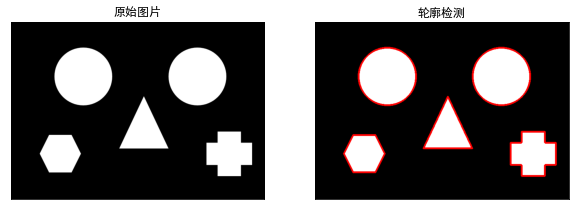

In [52]:
#### 轮廓检测

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

ori_img = cv2.imread("img/12.png")
res = ori_img.copy()
imgray = cv2.cvtColor(ori_img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

res = cv2.drawContours(res, contours, -3, (255,0,0), 3)

plt.figure(figsize=(10, 12))
plt.subplot(1,2,1),plt.imshow(ori_img[:,:,::-1])
plt.title('原始图片'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(res, cmap = 'gray')
plt.title('轮廓检测'), plt.xticks([]), plt.yticks([])

质心坐标: (133, 359)
质心坐标: (592, 360)
质心坐标: (360, 298)
质心坐标: (506, 150)
质心坐标: (196, 150)


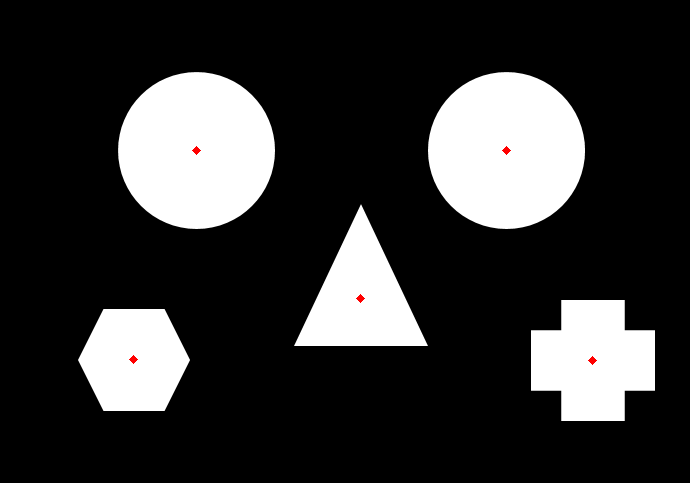

In [5]:
### 求矩

ori_img = cv2.imread("img/12.png")
res = ori_img.copy()
imgray = cv2.cvtColor(ori_img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt) ### 轮廓面积
    perimeter = cv2.arcLength(cnt,True) ### 轮廓周长，True--对象的形状是闭合的，否则False
    M = cv2.moments(cnt) ### 矩
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    # print(M)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    ### 质心坐标
    print(f"质心坐标: {cx, cy}")
res = cv2.circle(res, (cx,cy), 2, (0,0,255), 3)
    

cv2pil(res)

In [38]:
#### 显示标签
from PIL import Image, ImageDraw, ImageFont

def label_on_pilimg(pil_img, label, label_loc=(10,20)):
    """
    在图像上添加文字标签：
    pil_img： pil 图像，
    label： 文字标签内容，
    label_loc： 坐标位置
    """
    # 设置字体格式及大小
    local_font_path = "D:font/simhei.ttf"
    font = ImageFont.truetype(font=local_font_path, size=np.floor(1.5e-2 * np.shape(pil_img)[1] + 10).astype('int32'))
    draw = ImageDraw.Draw(pil_img)
    label_size = draw.textsize(label, font)
    
    # 设置文字 label起点
    outline_color = "red" ### 框线颜色
    text_fill_color = "red" ### 文本框颜色
    color_of_text = (255, 255, 255)
    X, Y = label_loc ## 文字位置坐标
    text_origin = np.array([X, Y - label_size[1]])
    
    # 绘制矩形框，加入label文本
    draw.rectangle([tuple(text_origin), tuple(text_origin + label_size)], fill=text_fill_color)
    draw.text(text_origin, str(label), fill=color_of_text, font=font)
    del draw, font, text_origin
    
    return pil_img


def label_on_cv2img(cv2_img, label, label_loc=(10, 20)):
    """
    cv2图像显示标签（不支持中文！）
    """
    # 设置字体格式及大小
    font = cv2.FONT_HERSHEY_SIMPLEX
    # 获取label长宽
    label_size = cv2.getTextSize(label, font, 1, 2)
    # 设置label起点
    color_of_text = (255, 255, 255)
    X, Y = label_loc ## 文字位置坐标
    
    text_origin = np.array([X, Y - label_size[0][1]])
    cv2.rectangle(cv2_img, tuple(text_origin), tuple(text_origin + label_size[0]), 
                  color=(0, 0, 255), thickness = -1)  # thickness=-1 表示矩形框内颜色填充
    
    cv2.putText(cv2_img, label, (X, Y - 5), font, 1, color_of_text,  2)
    
    return cv2_img


ori_img = cv2.imread("img/12.png")

# pil_img = cv2pil(ori_img)
# label_on_pilimg(pil_img, "你好", (20,20))
# cv2pil(label_on_cv2img(ori_img, "you are best", (20, 30)))


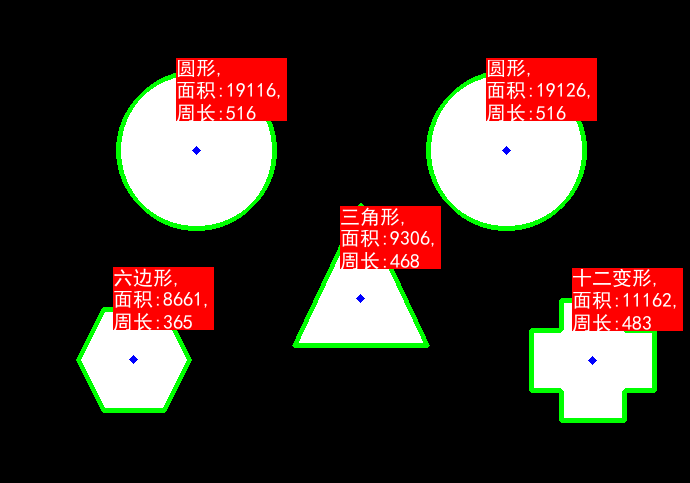

In [83]:
#### 轮廓形状判断

def shapeType(approx):
    """ 轮廓形状 """
    cntTyple = "三角形"
    if len(approx) == 3:
        cntTyple = "三角形"
    elif len(approx) == 4:
        cntTyple = "矩形"
    elif len(approx) == 5:
        cntTyple = "五角星"
    elif len(approx) == 6:
        cntTyple = "六边形"
    elif len(approx) == 8:
        cntTyple = "圆形"
    elif len(approx) == 12:
        cntTyple = "十二变形"
    
    return cntTyple


def cnt_detect(res, contours):
    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt) ### 轮廓面积
        
        if area > 200:
            perimeter = cv2.arcLength(cnt,True) ### 轮廓周长，True--对象的形状是闭合的，否则False
            M = cv2.moments(cnt) ### 矩
            epsilon = 0.02 * cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt,epsilon,True) ### 轮廓拟合
            cx, cy = int(M['m10']/M['m00']), int(M['m01']/M['m00']) ### 质心坐标
            res = cv2.drawContours(res, [cnt], -3, (0,255,), 3) ### 显示轮廓
            cntTyple = shapeType(approx) ### 轮廓形成
            
            text = f"{cntTyple},\n面积:{int(area)},\n周长:{int(perimeter)}"
            res = cv2.circle(res, (cx,cy), 2, (255,0,0), 4)
            res_pil = label_on_pilimg(cv2pil(res), text, (cx - 20, cy -30))
            res = pil2cv(res_pil)
        
    return res
        

ori_img = cv2.imread("img/12.png")
res = ori_img.copy()
imgray = cv2.cvtColor(ori_img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt) ### 轮廓面积
    perimeter = cv2.arcLength(cnt,True) ### 轮廓周长，True--对象的形状是闭合的，否则False
    M = cv2.moments(cnt) ### 矩
    epsilon = 0.02 * cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True) ### 轮廓拟合
    cx, cy = int(M['m10']/M['m00']), int(M['m01']/M['m00']) ### 质心坐标
    res = cv2.drawContours(res, [cnt], -3, (0,255,), 3) ### 显示轮廓
    cntTyple = shapeType(approx) ### 轮廓形成
    
    text = f"{cntTyple},\n面积:{int(area)},\n周长:{int(perimeter)}"
    res = cv2.circle(res, (cx,cy), 2, (255,0,0), 4)
    res_pil = label_on_pilimg(cv2pil(res), text, (cx - 20, cy -30))
    res = pil2cv(res_pil)


cv2pil(res)

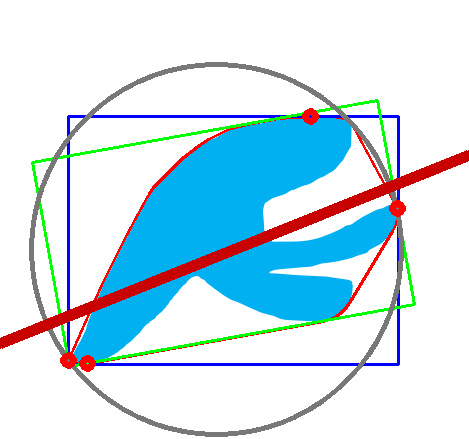

In [230]:


def cntsShow(res, contours):
    
    """ 轮廓凸性判断， 外接矩形，最小外接矩，
        最小外接圆， 椭圆拟合， 直线拟合，极点
    """
    
    rows,cols = res.shape[:2]
    for cnt in contours:
        area = cv2.contourArea(cnt)
        hull = cv2.convexHull(cnt) ### 
        k = cv2.isContourConvex(cnt) ### 凸性判断
        if not k and area > 100:
        # if area > 100:
            x,y,w,h = cv2.boundingRect(cnt) ### 外接矩形
            rect = cv2.minAreaRect(cnt) ###最小外接矩：矩形的中心(x,y) 和 (宽,高), 旋转角度
            box = cv2.boxPoints(rect) ### 最小外接矩4个脚坐标
            (cx,cy), radius = cv2.minEnclosingCircle(cnt) ### 最小外接圆
            ellipse = cv2.fitEllipse(cnt) ### 椭圆拟合
            [vx,vy,x1,y1] = cv2.fitLine(cnt, cv2.DIST_L2, 0, 0.01,0.01) ###拟合直线
            lefty = int((-x1*vy/vx) + y1)
            righty = int(((cols-x1)*vy/vx)+y1)
            center, radius = (int(cx),int(cy)), int(radius)
            box = np.int0(box)
            
            ### 极点：
            leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
            rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
            topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
            bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
            cv2.drawContours(res, [hull], -1, (0,0,255), 2) ###显示凸性轮廓
            cv2.rectangle(res, (x,y), (x+w,y+h),(255, 0, 0), 2 ) ###显示边界矩形
            cv2.drawContours(res, [box],  0, (0, 255, 0), 2) ###显示最小外接矩
            cv2.circle(res, center, radius, (120, 120, 120), 4 ) ### 显示最小外接圆
            cv2.line(res,(cols-1,righty),(0,lefty),(0,0,200),10) ### 显示拟合直线
            
            for c in [leftmost, rightmost, topmost, bottommost]: ###显示极点
                cv2.circle(res, c, 5, (0, 0, 255), 5)
    
    return res


url_Path = "https://img1.baidu.com/it/u=3022120453,1301716802&fm=253&fmt=auto&app=138&f=JPEG?w=300&h=300"
# url_Path = "https://img1.baidu.com/it/u=607001496,1890423195&fm=253&fmt=auto&app=138&f=JPEG?w=500&h=500"
# url_Path = "https://img1.baidu.com/it/u=3856804669,1424752139&fm=253&fmt=auto&app=138&f=JPEG?w=434&h=500"
# url_Path = "https://img2.baidu.com/it/u=2958378631,2762377368&fm=253&fmt=auto&app=138&f=JPEG?w=604&h=500"


ori_img = url2img(url_Path)
ori_img = cv2.imread("img/11.png")
gray = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
res = ori_img.copy()
cv2pil(ori_img)

res = cntsShow(res, contours)
cv2pil(res)

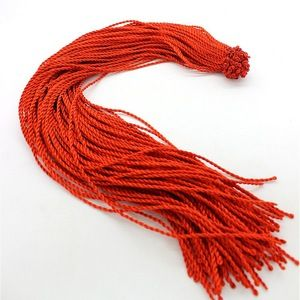

In [231]:
#### 


url_Path = "https://img1.baidu.com/it/u=3022120453,1301716802&fm=253&fmt=auto&app=138&f=JPEG?w=300&h=300"
# url_Path = "https://img1.baidu.com/it/u=607001496,1890423195&fm=253&fmt=auto&app=138&f=JPEG?w=500&h=500"
# url_Path = "https://img1.baidu.com/it/u=3856804669,1424752139&fm=253&fmt=auto&app=138&f=JPEG?w=434&h=500"
# url_Path = "https://img2.baidu.com/it/u=2958378631,2762377368&fm=253&fmt=auto&app=138&f=JPEG?w=604&h=500"


ori_img = url2img(url_Path)

cv2pil(ori_img)